# 讀取資料

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立函數

In [6]:
#定義weight函數
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1),name = 'w')

In [7]:
#定義bias函數
def bias(shape):
    return tf.Variable(tf.constant(0.1,shape=shape),name = 'b')

In [8]:
#定義conv2d函數，用於進行卷積運算
def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding='SAME')

In [9]:
#定義max_pool_2x2函數，用於池化層
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                          strides=[1,2,2,1],
                          padding='SAME')

# 建立模型

In [12]:
#輸入層
with tf.name_scope('input_layer'):
    x = tf.placeholder("float",shape=[None,784],name='x')
    x_image = tf.reshape(x,[-1,28,28,1])

In [14]:
#卷積層1
with tf.name_scope('c1_conv'):
    w1 = weight([5,5,1,16])
    b1 = bias([16])
    conv1 = conv2d(x_image,w1) + b1
    c1_conv = tf.nn.relu(conv1)

In [15]:
#池化層1
with tf.name_scope('c1_pool'):
    c1_pool = max_pool_2x2(c1_conv)

In [16]:
#卷積層2
with tf.name_scope('C2_Conv'):
    w2 = weight([5,5,16,36])
    b2 = bias([36])
    conv2 = conv2d(c1_pool,w2) + b2
    c2_conv = tf.nn.relu(conv2)

In [17]:
#池化層2
with tf.name_scope('c2_pool'):
    c2_pool = max_pool_2x2(c2_conv)

In [19]:
#建立平坦層
with tf.name_scope('c2_flat'):
    d_flat = tf.reshape(c2_pool,[-1,1764])

In [21]:
#建立隱藏層
with tf.name_scope('d_hidden_layer'):
    w3 = weight([1764,128])
    b3 = bias([128])
    d_hidden = tf.nn.relu(tf.matmul(d_flat,w3)+b3)
    d_hidden_dropout = tf.nn.dropout(d_hidden,rate = 1 - 0.8)

In [22]:
#建立輸出層
with tf.name_scope('output_layer'):
    w4 = weight([128,10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(d_hidden_dropout,w4) +b4)

# 定義訓練方式

In [23]:
with tf.name_scope("optimizer"):
    #建立訓練資料label真實值的placeholder
    y_label = tf.placeholder("float",shape=[None,10],name = "y_label")
    #定義loss function(cross entropy)
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_label, logits=y_predict))
    #定義optimizer最優化方法
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [24]:
#定義模型的準確率函數
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict,1),
                                  tf.argmax(y_label,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 進行訓練 

In [25]:
#定義訓練參數
trainepochs = 30
batchsize = 100
totalbatchs = int(mnist.train.num_examples/batchsize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
starttime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
#開始訓練
for epoch in range(trainepochs):
    for i in range(totalbatchs):
        batch_x,batch_y = mnist.train.next_batch(batchsize)
        sess.run(optimizer,feed_dict={x:batch_x,
                                      y_label:batch_y})
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,
                                                            y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' % (epoch+1),"loss=",\
          "{:.9f}".format(loss),"Accuracy=",acc)
duration = time()-starttime
print("Train Finished takes:",duration)

Train Epoch: 01 loss= 1.500869870 Accuracy= 0.9634
Train Epoch: 02 loss= 1.491995811 Accuracy= 0.971
Train Epoch: 03 loss= 1.482505202 Accuracy= 0.9794
Train Epoch: 04 loss= 1.477242827 Accuracy= 0.9852
Train Epoch: 05 loss= 1.478324652 Accuracy= 0.9834
Train Epoch: 06 loss= 1.477203250 Accuracy= 0.9848
Train Epoch: 07 loss= 1.476323485 Accuracy= 0.9856
Train Epoch: 08 loss= 1.474857569 Accuracy= 0.9864
Train Epoch: 09 loss= 1.475708008 Accuracy= 0.985
Train Epoch: 10 loss= 1.473488450 Accuracy= 0.988
Train Epoch: 11 loss= 1.474086285 Accuracy= 0.9874
Train Epoch: 12 loss= 1.474177361 Accuracy= 0.987
Train Epoch: 13 loss= 1.472503662 Accuracy= 0.9892
Train Epoch: 14 loss= 1.472225070 Accuracy= 0.9894
Train Epoch: 15 loss= 1.471628070 Accuracy= 0.9896
Train Epoch: 16 loss= 1.472083211 Accuracy= 0.989
Train Epoch: 17 loss= 1.473590612 Accuracy= 0.9876
Train Epoch: 18 loss= 1.472531080 Accuracy= 0.9884
Train Epoch: 19 loss= 1.472522616 Accuracy= 0.9886
Train Epoch: 20 loss= 1.472244143 Ac

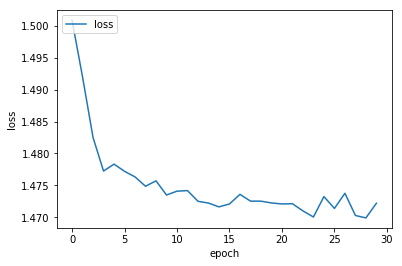

In [27]:
#畫出loss執行結果
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

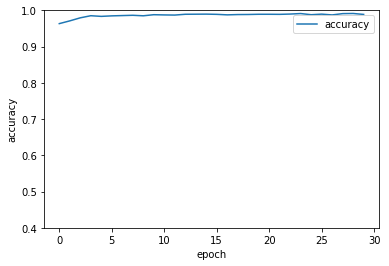

In [28]:
#畫出accuracy執行結果
%matplotlib inline
plt.plot(epoch_list,accuracy_list,label='accuracy')
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.ylim(0.4,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 評估模型準確率

In [29]:
#評估模型準確率
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,
                                               y_label:mnist.test.labels}))

Accuracy: 0.9901


# 進行預測

In [30]:
#預測
prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [31]:
import numpy as np
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


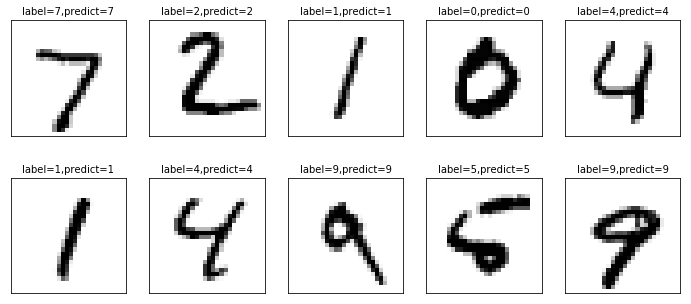

In [32]:
decoded = input_data.read_data_sets("MNIST_data/",one_hot = False)
decoded.test.labels
plot_image_labels_prediction(mnist.test.images,decoded.test.labels,prediction_result,idx=0)

In [46]:
#進行單張預測
test_num = 100
photo = np.reshape(mnist.test.images[test_num],(1,784))

photo_prediction = sess.run(tf.argmax(y_predict,1),feed_dict={x:photo})
print("模型預測值:",str(photo_prediction))
print("圖片正確值:",str(decoded.test.labels[test_num]))

模型預測值: [6]
圖片正確值: 6
